# Graph Based Spin Lattice

### Find lowest ground state of simple Ising Hamiltonian
For a graph, $G = (E,V)$, defined by a set of edges, $E$, and vertices, $V$, we want to represent an Ising model, where the edge weights, $w_{ij}$ are given by the spin interactions, i.e., $w_{ij} = J_{ij}$.

Given a configuration of spins (e.g., $\uparrow\downarrow\downarrow\uparrow\downarrow$) we can define the energy using what is referred to as an Ising Hamiltonian:
$$ \hat{H} = \sum_{(i,j)\in E}J_{ij} s_is_j$$
where, $s_i=1$ if the $i^{th}$ spin is `up` and $s_i=-1$ if it is `down`, and the sumation runs over all edges in the graph. 


In [1]:
# Load relevant libraries. If you have errors you probably need to install them into your conda env

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy
random.seed(2)

### Create a graph that defines the Ising interactions

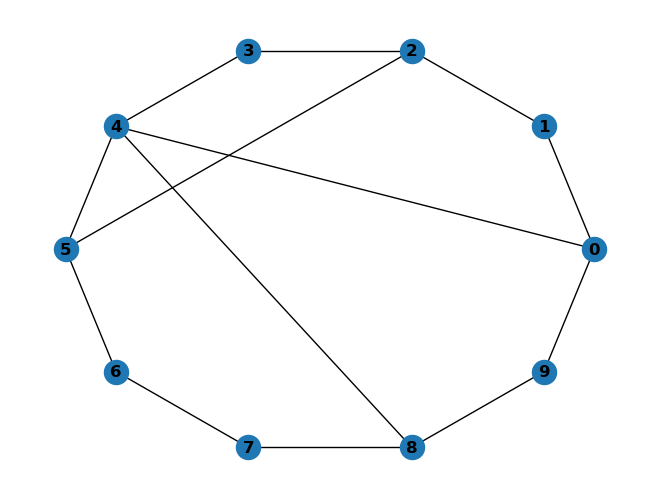

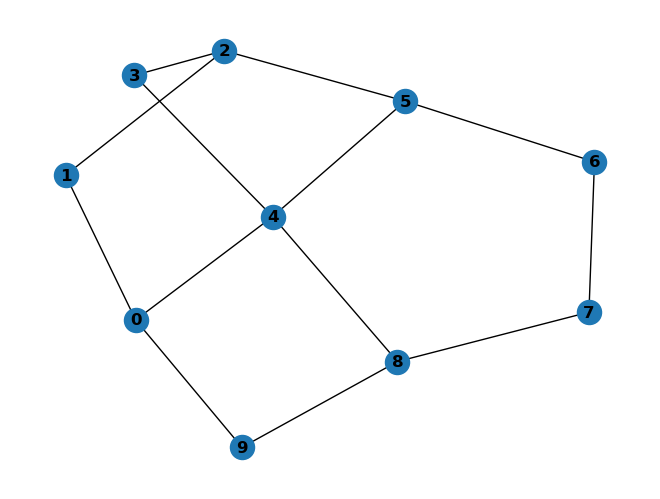

In [2]:
G = nx.Graph()
G.add_nodes_from([i for i in range(10)])
G.add_edges_from([(i,(i+1)% G.number_of_nodes() ) for i in range(10)])
G.add_edge(2,5)
G.add_edge(4,8)
G.add_edge(4,0)
for e in G.edges:
    G.edges[e]['weight'] = 1.0

# Now Draw the graph. First we will draw it with the nodes arranged on the circle, then we will draw the same graph 
# with the position of the nodes optimized for easier visualization
plt.figure(1)
nx.draw(G, with_labels=True, font_weight='bold', pos=nx.circular_layout(G))
plt.figure(2)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()



array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

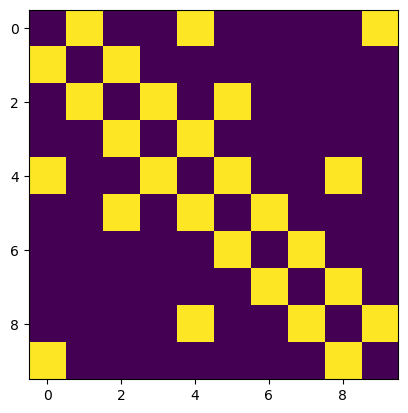

In [3]:
A = nx.adjacency_matrix(G).todense()
display(A)
plt.imshow(A);

### Add your BitString class below

In [4]:
import numpy as np
import math    
import copy as cp         

class BitString:
    """
    Simple class to implement a config of bits
    """
    def __init__(self, N):
        self.N = N
        self.config = np.zeros(N, dtype=int) 

    def __repr__(self):
        out = ""
        for i in self.config:
            out += str(i)
        return out

    def __eq__(self, other):        
        return all(self.config == other.config)
    
    def __len__(self):
        return len(self.config)

    def on(self):
        """
        Return number of bits that are on
        """
        return np.sum(self.config)

    def off(self):
        """
        Return number of bits that are off
        """
        return self.N - self.on()

    def flip_site(self, i):
        """
        Flip the bit at site i
        """
        self.config[i] = 1 - self.config[i]
    
    def integer(self):
        """
        Return the decimal integer corresponding to BitString
        """
        val = 0
        for i in range(self.N):
            val += self.config[i] * 2**(self.N - 1 - i)
        return val

    def set_config(self, s:list[int]):
        """
        Set the config from a list of integers
        """
        self.config = np.array(s, dtype=int)

    def set_integer_config(self, dec:int):
        """
        convert a decimal integer to binary
    
        Parameters
        ----------
        dec    : int
            input integer
            
        Returns
        -------
        Bitconfig
        """
        self.config = np.zeros(self.N, dtype=int)
        for i in range(self.N):
            self.config[self.N - 1 - i] = dec % 2
            dec = dec // 2

### Write a function that calculates the energy of a particular configuration of spins below

In [6]:
def energy(bs: BitString, G: nx.Graph):
    """Compute energy of configuration, `bs`

        .. math::
            E = \\left<\\hat{H}\\right>

    Parameters
    ----------
    bs   : Bitstring
        input configuration
    G    : Graph
        input graph defining the Hamiltonian
    Returns
    -------
    energy  : float
        Energy of the input configuration
    """
    E = 0.0
    for e in G.edges:
        i, j = e
        E += G.edges[e]['weight'] * bs.config[i] * bs.config[j]
    return E


### Naive minimization

Loop over all configurations and compute energies to find the lowest

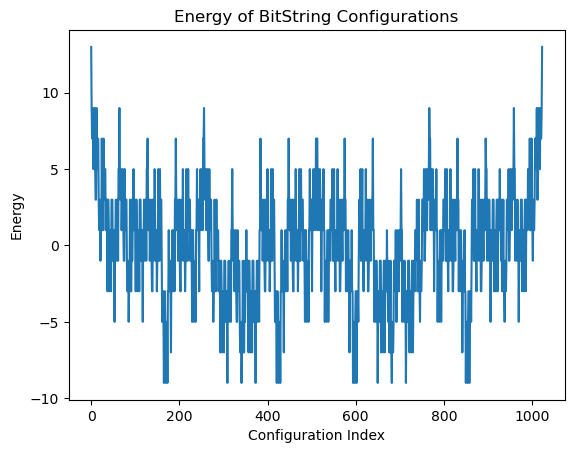

 Lowest energy  -9.00000000: 0010100101


In [ ]:
x = [] # Store list of indices
y = [] # Store list of energies
xmin = None # configuration of minimum energy configuration
emin = 0 # minimum of energy
my_bs = BitString(10)

# Your code here
# Use Ising spins s_i in {-1, +1} mapped from bits {0, 1}
def energy(bs: BitString, G: nx.Graph):
	E = 0.0
	for i, j in G.edges:
		si = 2 * bs.config[i] - 1
		sj = 2 * bs.config[j] - 1
		E += G.edges[i, j]['weight'] * si * sj
	return E

emin = np.inf
xmin = None

# Loop over all configurations
for idx in range(2**len(my_bs)):
	my_bs.set_integer_config(idx)
	E = energy(my_bs, G)

	x.append(idx)
	y.append(E)

	if E < emin:
		emin = E
		xmin = idx

# Print out all the energies
plt.plot(x,y)
plt.xlabel("Configuration Index")
plt.ylabel("Energy")
plt.title("Energy of BitString Configurations")
plt.show()

my_bs.set_integer_config(xmin)
print(" Lowest energy %12.8f: %s" %(emin, my_bs))

assert(abs(energy(my_bs, G) - -9) < 1e-12)


### Visualize ground state
Print out the graph again, this time coloring each node according to it's state (0 or 1)

Configuration: 0010100101


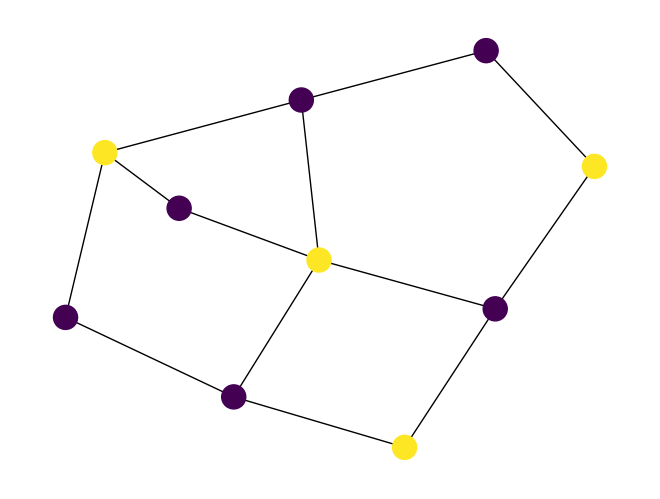

In [9]:
print("Configuration: %s" %my_bs)
nx.draw(G, node_color=my_bs.config)